In [83]:
import numpy as np
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

In [80]:
INIT_LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 10
IMAGE_SIZE = 256
default_image_size = tuple((IMAGE_SIZE, IMAGE_SIZE))
image_size = 0
data_dir = './All-20230430T073321Z-001/All/'
CHANNELS=3
AUTOTUNE = tf.data.AUTOTUNE
class_names = ["GLS", "CR", "NLB", ""]

In [6]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = ds.cardinality().numpy()
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=default_image_size,
  batch_size=BATCH_SIZE
)


train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

Found 2352 files belonging to 4 classes.


In [23]:
interpreter = tf.lite.Interpreter(model_path="Salinan DLmodel.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_sequential_input:0', 'index': 0, 'shape': array([  1, 256, 256,   3]), 'shape_signature': array([ -1, 256, 256,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [70]:
y_predict = []  
y_test = [] 

for image_batch, label_batch in val_ds:   # use dataset.unbatch() with repeat
    for label in label_batch:
        y_test.append(label.numpy())
    for image in image_batch:
        x = np.expand_dims(image, axis=0)  # Use only the first image and add a batch dimension
        interpreter.set_tensor(input_details[0]['index'], x)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])
        y_predict.append(np.argmax(output, axis=-1))

y_predict = [i.tolist()[0] for i in y_predict]

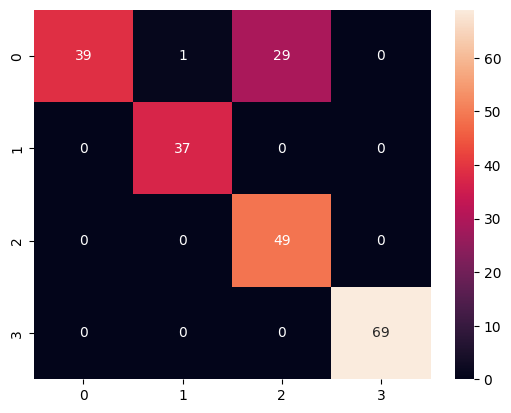

In [84]:
cm = confusion_matrix(y_pred=y_predict, y_true=y_test)
f = sns.heatmap(cm, annot=True)

In [82]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(y_true=y_test, 
                                 y_pred=y_predict,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

TypeError: plot_confusion_matrix() got an unexpected keyword argument 'y_pred'

In [71]:
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.8660714285714286


In [87]:
y_predict

[0,
 1,
 2,
 3,
 3,
 2,
 2,
 0,
 3,
 3,
 2,
 3,
 3,
 0,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 0,
 1,
 1,
 3,
 2,
 1,
 3,
 1,
 2,
 2,
 3,
 1,
 1,
 2,
 0,
 3,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 0,
 0,
 3,
 3,
 1,
 3,
 3,
 2,
 3,
 0,
 3,
 1,
 0,
 3,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 1,
 2,
 0,
 3,
 3,
 3,
 3,
 1,
 3,
 0,
 2,
 2,
 3,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 3,
 3,
 0,
 1,
 3,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 0,
 2,
 0,
 0,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 0,
 2,
 3,
 0,
 0,
 3,
 0,
 3,
 1,
 2,
 2,
 3,
 2,
 2,
 1,
 0,
 2,
 2,
 3,
 0,
 3,
 3,
 2,
 0,
 0,
 1,
 1,
 2,
 3,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 3,
 2,
 2,
 2,
 2,
 0,
 3,
 1,
 1,
 3,
 0,
 3,
 0,
 1,
 0,
 0,
 2,
 2,
 3,
 0,
 1,
 3,
 0,
 2,
 3,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 0,
 3,
 0,
 2,
 3,
 3,
 3,
 2,
 1,
 2,
 1,
 3,
 3,
 3,
 2,
 2,
 3,
 1,
 3,
 2,
 1,
 1,
 2,
 2,
 0,
 3,
 2,
 0,
 2,
 1,
 2]

In [86]:
accuracy = accuracy_score(y_test, y_predict)
precission = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict,average='micro')
#auc = roc_auc_score(y_test, y_predict, multi_class='ovr')
f1 = f1_score(y_test, y_predict,average='micro')
print(f"accuracy : {accuracy} | recall : {recall} | precission : {precission} | F1 : {f1}")

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].